In [20]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display+.expand_frame_repr', False)
warnings.filterwarnings("ignore")

Path =  pd.read_csv('Data_Balanced.csv', delimiter=',')
print( Path.describe().T)

X = Path.iloc[:,0:11]
y = Path.iloc[:,-1]


#Path.head()

                   count       mean       std    min        25%        50%        75%      max
CARRERA             76.0   1.619594  0.725791   1.00   1.000000   1.125341   2.029952   3.0000
SEXO                76.0   1.467692  0.447915   1.00   1.000000   1.464262   2.000000   2.0000
EDAD                76.0   1.166912  0.350334   1.00   1.000000   1.000000   1.000000   2.0000
SECUNDARIA          76.0   1.183760  0.328601   1.00   1.000000   1.000000   1.231059   2.0000
NOTA_INGRESO        76.0  38.595277  7.550535  21.30  32.718970  37.893864  42.862500  60.5500
MODALIDAD_INGRESO   76.0   1.317399  0.425995   1.00   1.000000   1.000000   1.750492   2.0000
DEPENDIENTE         76.0   1.898878  0.271912   1.00   2.000000   2.000000   2.000000   2.0000
TOTAL_INGRESOS      76.0   1.852073  0.725450   1.00   1.097206   2.000000   2.104751   3.0000
PROMEDIO            76.0   8.140976  4.388576   1.55   3.486794   9.125000  11.839125  15.6522
AMONESTACIONES      76.0   0.599708  0.472418   0.

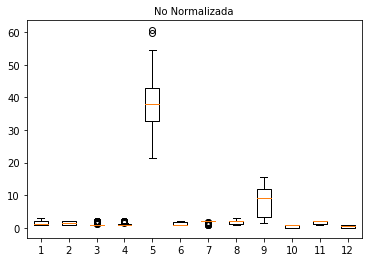

In [2]:
data = [ Path['CARRERA'], Path['SEXO'], Path['EDAD'], Path['SECUNDARIA'], Path['NOTA_INGRESO'], Path['MODALIDAD_INGRESO'], Path['DEPENDIENTE'], Path['TOTAL_INGRESOS'], Path['PROMEDIO'], Path['AMONESTACIONES'], Path['TERCIO'], Path['Class'] ]
plt.figure()
plt.title('No Normalizada', fontsize = 10)
plt.boxplot(data)

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

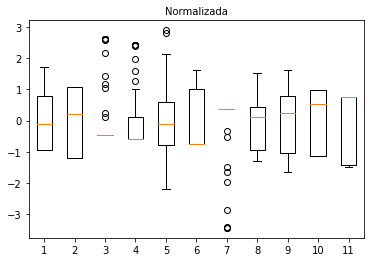

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

plt.figure()
plt.title('Normalizada', fontsize = 10)
plt.boxplot(X_train)
plt.show()

In [5]:
df = pd.read_csv('Data_Balanced2.csv', names=['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO','Class'])

features = ['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO']

x = df.loc[:, features].values 
y = df.loc[:,['Class']].values

x = StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalDf)

In [7]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
#print(finalDf)

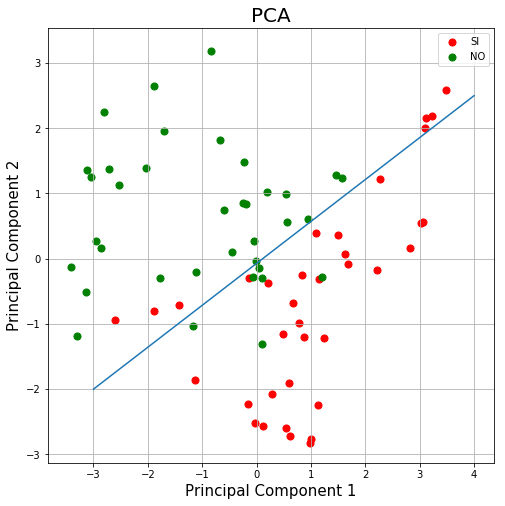

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

targets = ['SI', 'NO']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
plt.plot([4,-3],[2.50,-2])
ax.grid()

#features = ['SECUNDARIA','NOTA_INGRESO','DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','TERCIO']

In [9]:
from sklearn.preprocessing import scale
data = pd.DataFrame(scale(Path), columns=['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO','Class'])
data = data.drop(["TERCIO"], axis=1)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data)
pca_samples = pca.transform(data)

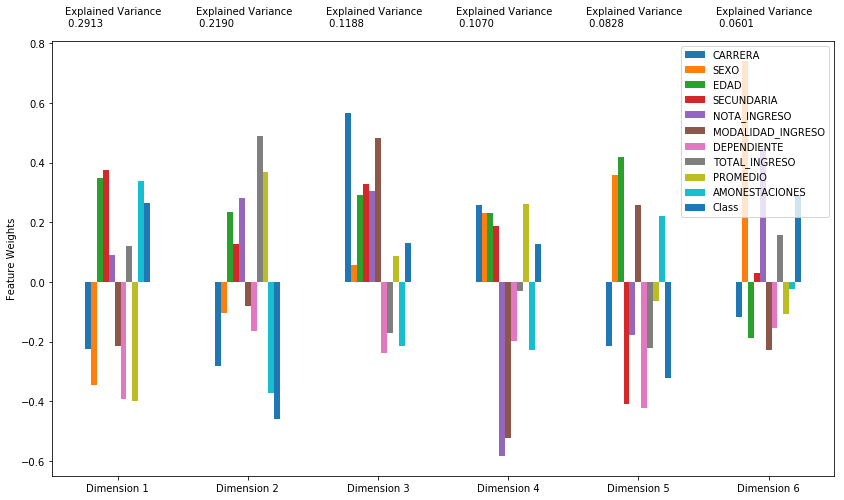

In [11]:
import numpy as np
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)


In [12]:
pca_results.cumsum()

,Explained Variance,CARRERA,SEXO,EDAD,SECUNDARIA,NOTA_INGRESO,MODALIDAD_INGRESO,DEPENDIENTE,TOTAL_INGRESO,PROMEDIO,AMONESTACIONES,Class
Dimension 1,0.2913,-0.2246,-0.3441,0.3502,0.3753,0.0915,-0.2157,-0.3908,0.1218,-0.3993,0.3389,0.2663
Dimension 2,0.5103,-0.5048,-0.4468,0.5844,0.5041,0.3728,-0.2966,-0.5552,0.6129,-0.0309,-0.0345,-0.1924
Dimension 3,0.6291,0.0608,-0.3893,0.8757,0.8324,0.6768,0.1878,-0.7923,0.4411,0.0577,-0.2499,-0.0613
Dimension 4,0.7361,0.3203,-0.1576,1.1077,1.0194,0.0931,-0.3344,-0.9919,0.4108,0.3186,-0.4769,0.0669
Dimension 5,0.8189,0.1053,0.2007,1.5273,0.6101,-0.0853,-0.0765,-1.4143,0.1905,0.2532,-0.2558,-0.2546
Dimension 6,0.8790,-0.0131,0.9427,1.3383,0.6415,0.3634,-0.3037,-1.5694,0.3493,0.1445,-0.2780,0.0355


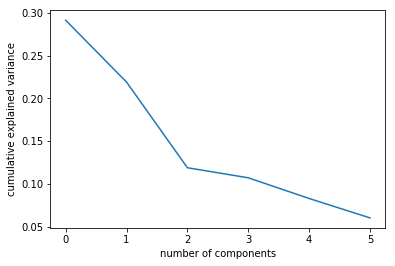

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Text(0.5,1,'Correlation between different fearures')

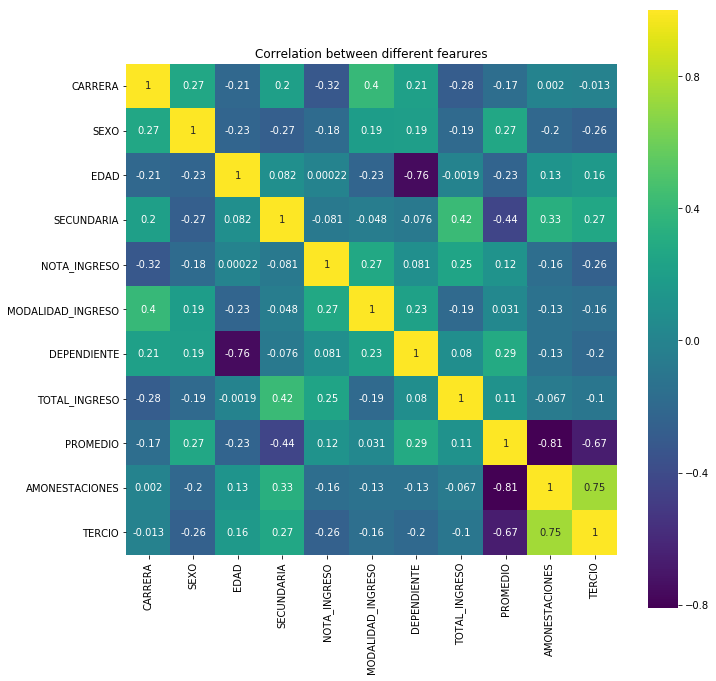

In [14]:
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [15]:
df = pd.read_csv('Data_Balanced2.csv', names=['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO','Class'])

features = ['CARRERA','SEXO','EDAD','SECUNDARIA','NOTA_INGRESO','MODALIDAD_INGRESO',
                             'DEPENDIENTE','TOTAL_INGRESO','PROMEDIO','AMONESTACIONES','TERCIO']

x = df.loc[:, features].values 
y = df.loc[:,['Class']].values

x = StandardScaler().fit_transform(x)

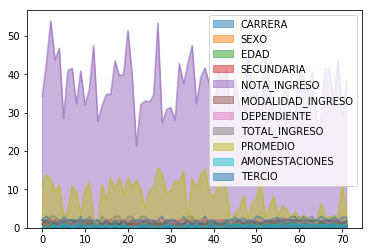

In [33]:
df.plot.area(stacked=False)

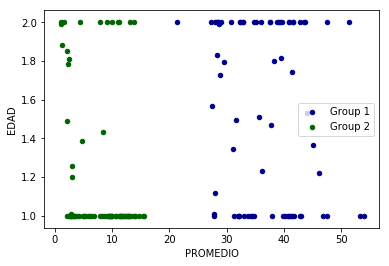

In [34]:
ax = df.plot.scatter(x='NOTA_INGRESO', y='SEXO', color='DarkBlue', label='Group 1')
df.plot.scatter(x='PROMEDIO', y='EDAD', color='DarkGreen', label='Group 2', ax=ax)